In [205]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [206]:
#df = read_csv('Data/sr_hex_truncated.csv')

In [252]:
df = read_csv('Data/service_request_compare/sr_hex.csv')

In [255]:
df2 = df.loc[((df['department'] == 'Water and Sanitation'))]

,Unnamed: 0,NotificationNumber,NotificationType,CreationDate,CompletionDate,Duration,CodeGroup,Code,Open,Latitude,Longitude,SubCouncil2016,Wards2016,OfficialSuburbs,directorate,department,ModificationTimestamp,CompletionTimestamp,CreationTimestamp,h3_level8_index
0,0,1011845437,C3,2017-01-01,2017-01-19,17.988889,WATER MANAGEMENT DEVICE,No Water WMD,False,-34.077527,18.546624,Subcouncil 23,43,STRANDFONTEIN,Water and Waste Services,Water and Sanitation,2017-01-19 18:41:27+02:00,2017-01-19 18:41:26+02:00,2017-01-01 18:57:26+02:00,88ad368893fffff
1,1,1011845442,C3,2017-01-01,2017-01-04,2.539896,WATER,Leak at Valve,False,-33.977231,18.454402,Subcouncil 20,59,NEWLANDS,Water and Waste Services,Water and Sanitation,2017-01-04 06:34:25+02:00,2017-01-04 06:34:24+02:00,2017-01-01 17:36:57+02:00,88ad361701fffff
3,3,1011845011,C3,2017-01-01,2017-01-25,23.931562,WATER,Broken Leading,False,-34.123117,18.863645,Subcouncil 8,86,LWANDLE,Water and Waste Services,Water and Sanitation,2017-01-25 07:43:37+02:00,2017-01-25 07:43:30+02:00,2017-01-01 09:22:03+02:00,88ad36d55bfffff
4,4,1011845299,C3,2017-01-01,2017-01-01,0.015567,SEWER,Sewer: Blocked/Overflow,False,NaN,NaN,None,None,None,Water and Waste Services,Water and Sanitation,2017-01-01 14:34:25+02:00,2017-01-01 14:34:20+02:00,2017-01-01 14:11:55+02:00,0
7,7,1011845522,C3,2017-01-01,2017-01-25,23.609803,SEWER,Sewer: Blocked/Overflow,False,-34.038688,18.523814,Subcouncil 18,65,LOTUS RIVER,Water and Waste Services,Water and Sanitation,2017-01-25 10:34:03+02:00,2017-01-25 10:34:02+02:00,2017-01-01 19:55:55+02:00,88ad368d23fffff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188090,3188090,1015462963,C3,2019-12-31,2020-03-11,70.883600,WATER,Broken Leading,False,-34.050200,18.488710,Subcouncil 18,110,GRASSY PARK,Water and Waste Services,Water and Sanitation,2020-03-12 11:05:53+02:00,2020-03-11 12:22:10+02:00,2019-12-31 15:09:47+02:00,88ad368d13fffff
3188091,3188091,1015462945,C3,2019-12-31,2020-01-22,21.870463,SEWER,Empty Septic Tank,False,-34.064513,18.505830,Subcouncil 18,67,ZEEKOEVLEI,Water and Waste Services,Water and Sanitation,2020-01-22 11:47:30+02:00,2020-01-22 11:47:29+02:00,2019-12-31 14:54:01+02:00,88ad368d57fffff
3188092,3188092,1015462900,C3,2019-12-31,2020-04-06,96.728218,WATER,Broken Leading,False,-33.982382,18.638721,Subcouncil 5,20,DELFT 8,Water and Waste Services,Water and Sanitation,2020-04-06 08:19:45+02:00,2020-04-06 08:19:43+02:00,2019-12-31 14:51:05+02:00,88ad361323fffff
3188094,3188094,1015462272,C3,2019-12-31,2020-01-02,1.853403,WATER,Leak at Water Meter / Stopcock,False,-34.013504,18.614949,Subcouncil 13,35,PHILIPPI,Water and Waste Services,Water and Sanitation,2020-01-02 08:00:04+02:00,2020-01-02 08:00:03+02:00,2019-12-31 11:31:09+02:00,88ad361351fffff


In [209]:
df2 = df2[['CreationTimestamp','h3_level8_index','NotificationType']]

In [210]:
df2['CreationTimestamp'] = df2.loc[:, ('CreationTimestamp')].astype(str).str[:10]

C:\Users\W7151998\AppData\Local\Temp/ipykernel_38072/698488876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CreationTimestamp'] = df2.loc[:, ('CreationTimestamp')].astype(str).str[:10]


In [211]:
#df2['h3_level8_index'] = df2['h3_level8_index'].astype(str)

In [212]:
df2.insert(loc=2, column='Total_Requests',value=1)

In [213]:
df2['CreationTimestamp'] = pd.to_datetime(df2['CreationTimestamp'])

C:\Users\W7151998\AppData\Local\Temp/ipykernel_38072/1663591082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CreationTimestamp'] = pd.to_datetime(df2['CreationTimestamp'])


In [214]:
#df2.dtypes

In [215]:
df3 = pd.DataFrame(df2)

In [216]:
df3.dtypes

CreationTimestamp    datetime64[ns]
h3_level8_index              object
Total_Requests                int64
NotificationType             object
dtype: object

In [217]:
df3 = df3.set_index('CreationTimestamp').last('12M').reset_index()

In [218]:
df3.head(2)

,CreationTimestamp,h3_level8_index,Total_Requests,NotificationType
0,2019-01-01,88ad36d5a9fffff,1,C3
1,2019-01-01,88ad361307fffff,1,C3


In [219]:
#df3 = pd.DataFrame(df3)

In [220]:
df_Type = df3.groupby(['NotificationType', pd.Grouper(key='CreationTimestamp', freq='D')])['Total_Requests'].sum().reset_index().sort_values('CreationTimestamp')
print (df_Type)

    NotificationType CreationTimestamp  Total_Requests
0                 C3        2019-01-01             813
365               N2        2019-01-02               6
1                 C3        2019-01-02            3135
2                 C3        2019-01-03            3262
366               N2        2019-01-03               3
..               ...               ...             ...
362               C3        2019-12-29             984
363               C3        2019-12-30            3417
657               N2        2019-12-30               8
364               C3        2019-12-31            2216
658               N2        2019-12-31               2

[659 rows x 3 columns]


In [221]:
df_Hex = df3.groupby(['h3_level8_index', pd.Grouper(key='CreationTimestamp', freq='D')])['Total_Requests'].sum().reset_index().sort_values('CreationTimestamp')
print (df_Hex)

        h3_level8_index CreationTimestamp  Total_Requests
0                     0        2019-01-01             102
214157  88ad368da5fffff        2019-01-01               2
213856  88ad368da3fffff        2019-01-01               5
33310   88ad36102bfffff        2019-01-01               1
33544   88ad361031fffff        2019-01-01               1
...                 ...               ...             ...
210449  88ad368d57fffff        2019-12-31               1
58556   88ad361141fffff        2019-12-31               3
73114   88ad3611e1fffff        2019-12-31               4
94427   88ad3612dbfffff        2019-12-31               1
138607  88ad361947fffff        2019-12-31               2

[273544 rows x 3 columns]


In [222]:
#df2 = df2.groupby(['NotificationType', pd.Grouper(key='CreationTimestamp', freq='D')])['Total_Requests'].sum().reset_index().sort_values('CreationTimestamp')
#print (df2)

In [223]:
#df3 = df2.loc[~((df2['h3_level8_index'] == '0'))]

In [224]:
#df3 = df3.groupby(by=['CreationTimestamp']).sum('Total_Requests').reset_index()

In [225]:
df_Type =  df_Type.drop(['NotificationType'], axis=1)

In [226]:
# prepare expected column names
df_Type.columns = ['ds', 'y']

In [227]:
#New Forecasts

In [228]:
#df4 = df3

In [229]:
#model_2 = Prophet(interval_width = 0.95, weekly_seasonality=True)
#model = model_2.fit(df4)

In [230]:
#future = model_2.make_future_dataframe(periods=4, freq='W')
#forecast = model_2.predict(future)

In [231]:
#forecast.tail(10)

In [232]:
#df4.tail(10)

In [233]:
#model_2.plot(forecast)

In [234]:
#len(df4)

In [235]:
#New Forecasts

In [236]:
#train=df4[:138]
#test=df4[138:]

#m=Prophet(weekly_seasonality=True)
#m.fit(train)
#future=m.make_future_dataframe(periods=40,freq='W')
#forecast=m.predict(future)


In [237]:
#forecast.taill()

In [238]:
#df4.tail()

In [239]:
#m.plot(forecast, uncertainty=True)
#plt.show()

In [240]:
#m.plot(forecast)
#ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
#test.plot(x='ds',y='y',legend=True,label='True Test Data',ax=ax,xlim=('2017-01-02','2020-01-06'))

In [241]:
#train, test = train_test_split(df4, test_size = 0.10, shuffle=False)
#model_fit = model_2.fit (train)
#future = model_.make_future_dataframe(periods=20, freq='W')
#predictions = model_fit.predict(future)
#model_fit.plot(predictions)

In [242]:
#predictions.tail()

In [243]:
#df3.tail()

In [244]:
model = Prophet()

train, test = train_test_split(df_Type, test_size = 0.10, shuffle=False)
model_fit = model.fit (train)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [245]:
future = model_fit.make_future_dataframe(periods=20, freq='D')
predictions = model_fit.predict(future)

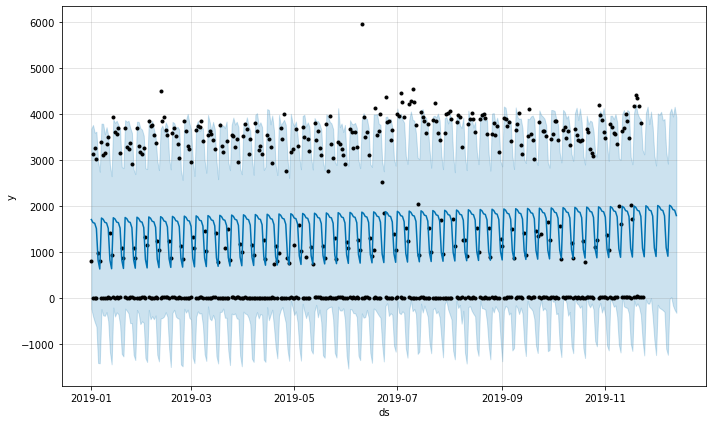

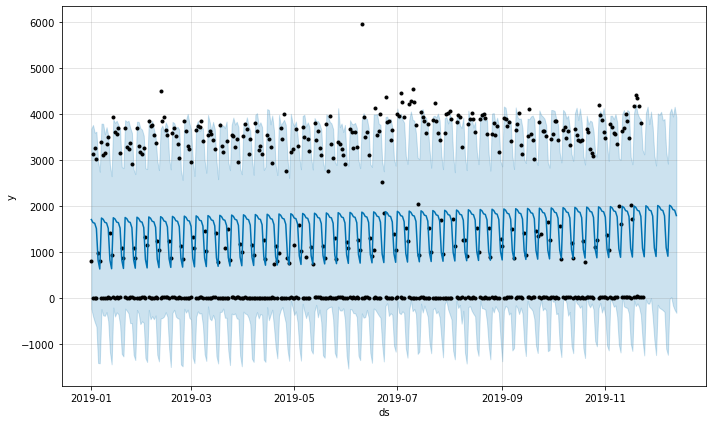

In [246]:
model_fit.plot(predictions)

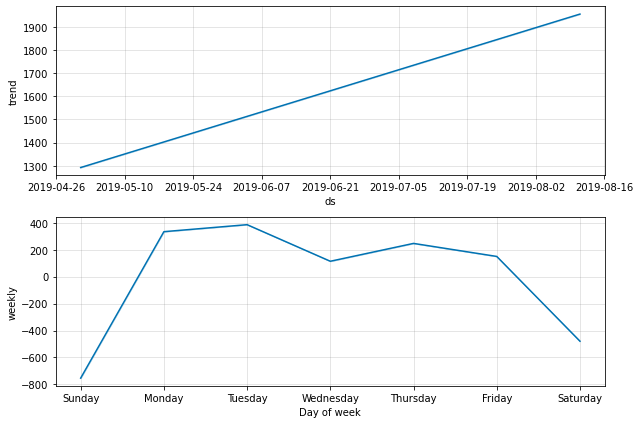

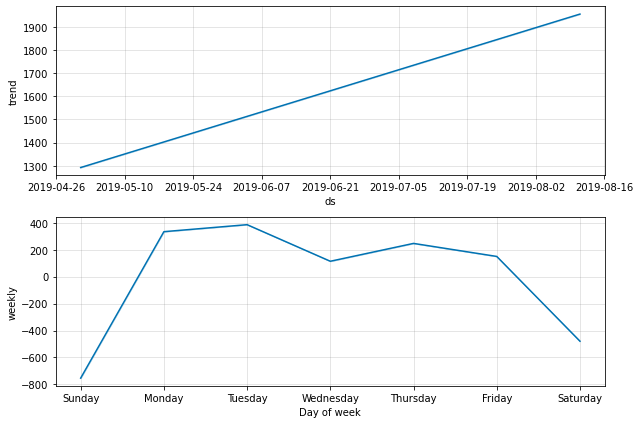

In [204]:
model_fit.plot_components(predictions)

In [247]:
predictions['yhat'] = np.round(predictions['yhat'])
final = predictions.rename({'ds': 'date','yhat' : 'Service Requests Expected'}, axis=1)

In [248]:
print("Final Answer:" )
final[['date','Service Requests Expected per Notification Type']].tail()


Final Answer:


,date,Service Requests Expected
342,2019-12-09,2016.0
343,2019-12-10,1989.0
344,2019-12-11,1922.0
345,2019-12-12,1909.0
346,2019-12-13,1793.0


In [250]:
df_Type.tail()

,ds,y
362,2019-12-29,984
363,2019-12-30,3417
657,2019-12-30,8
364,2019-12-31,2216
658,2019-12-31,2
